In [1]:
import pandas as pd
import scipy.interpolate as interp
import h5py
from tqdm import tqdm
import pandas as pd
import numpy as np
import itertools as it
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
from pathlib import Path

plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Computer Modern Roman"]})

from meta_feature import dataset_ids_CC18, anchor_list_denser, feature_num_CC18, class_num_CC18, learner_zoo

In [2]:
file_paths = [  Path.cwd() / '../dataset/LCDB11_ER_CC18_noFS_raw.hdf5',
                Path.cwd() / '../dataset/LCDB11_ER_CC18_minmaxFS_raw.hdf5',
                Path.cwd() / '../dataset/LCDB11_ER_CC18_standardFS_raw.hdf5']
dataset_nofs, dataset_minmaxfs, dataset_standardfs = [h5py.File(fp, 'r')['error_rate'][...] for fp in file_paths]


### shapes of learning curves

learner: 22, dataset: 71


C:\Users\cyan1\AppData\Local\Temp\ipykernel_25704\2642089202.py:18: RuntimeWarning: Mean of empty slice
  mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
C:\Users\cyan1\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


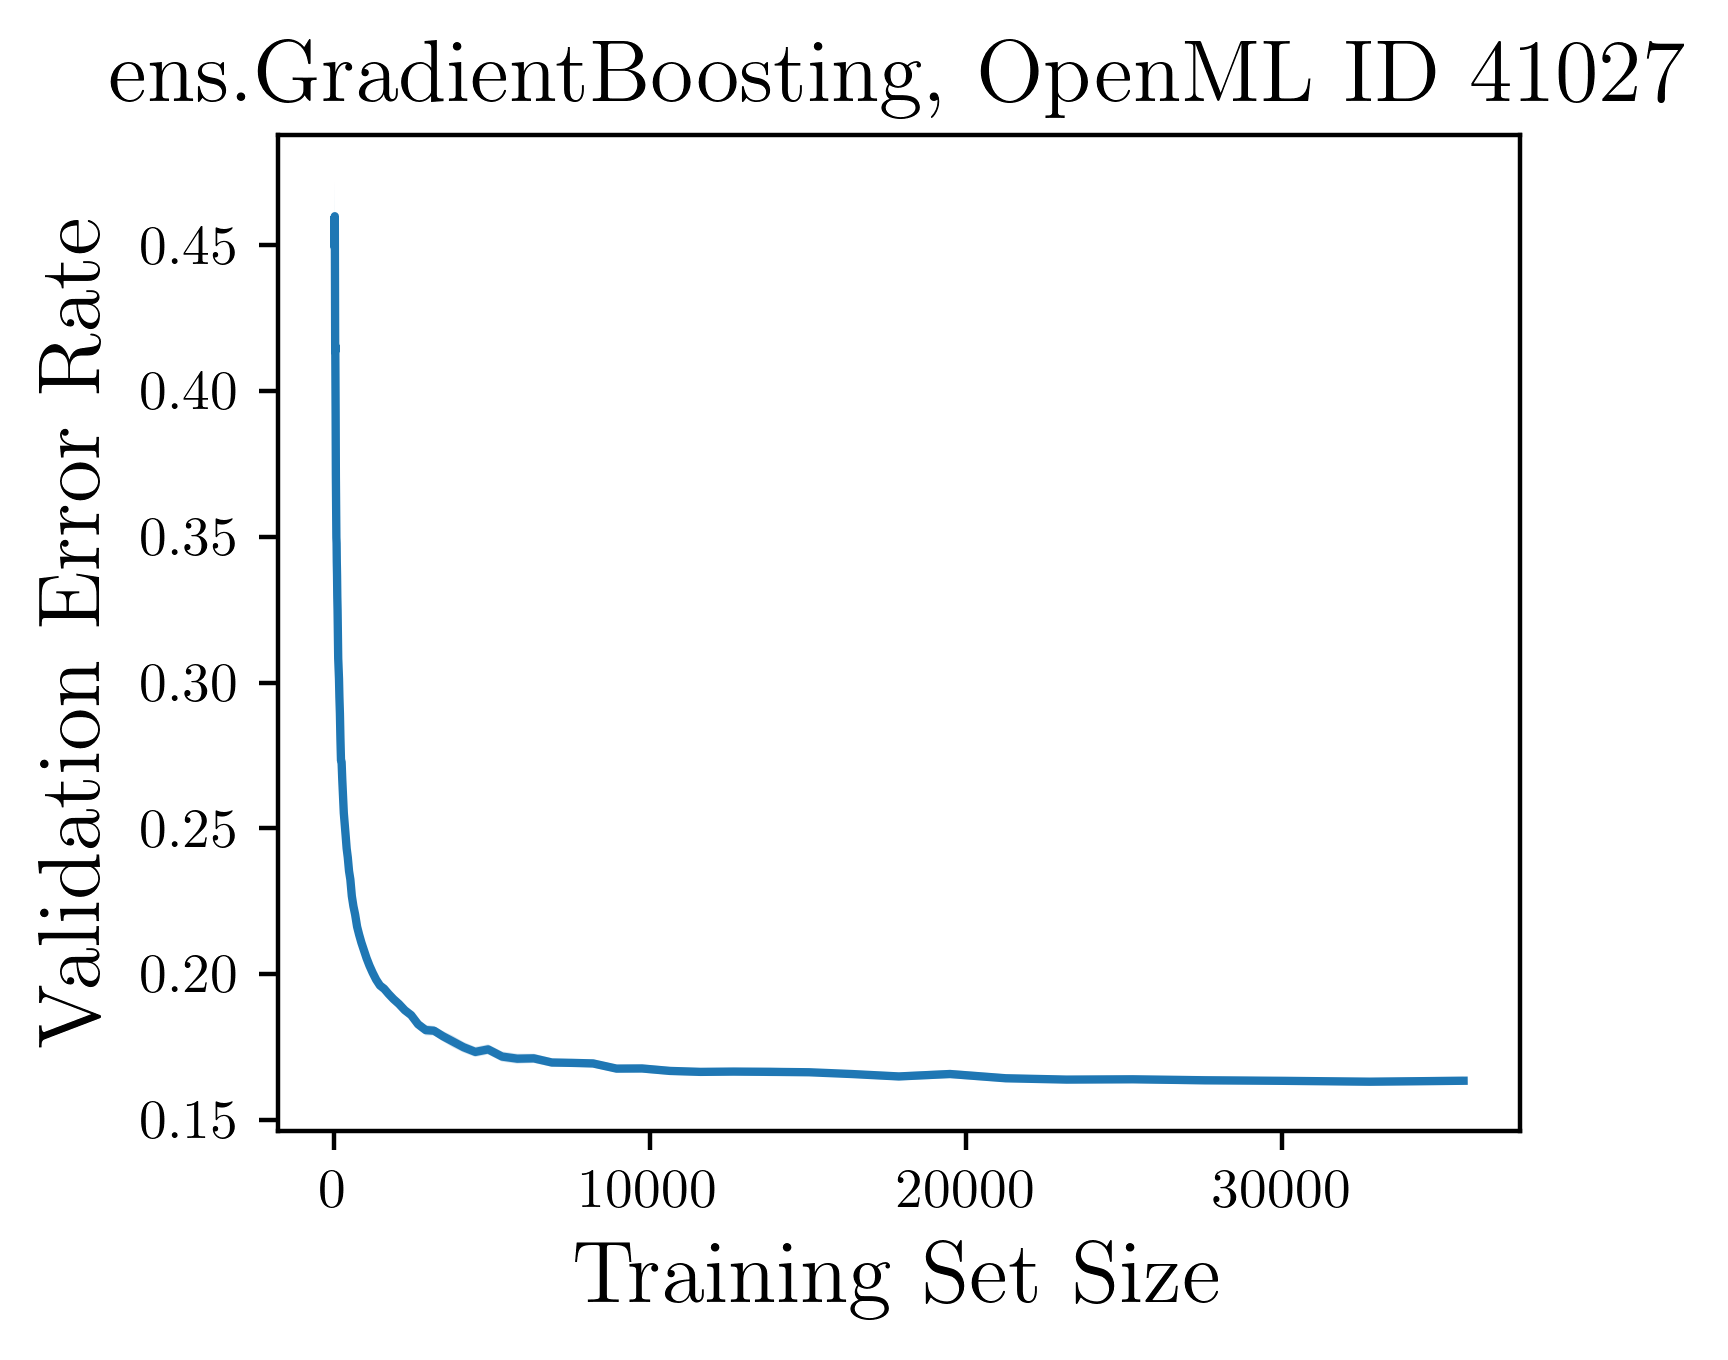

In [3]:
# transition
LEARNER = 11
DATASET = 66

# peaking
LEARNER = 12
DATASET = 58 

# dipping
LEARNER = 3
DATASET = 42
LEARNER = 22
DATASET = 71

print(f"learner: {LEARNER}, dataset: {DATASET}")

lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
se_clean = np.nanstd(lc_clean[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean[:, :, :]), axis=(0, 1)))


plt.figure(figsize=(4, 3.5), dpi=400)
plt.plot(anchor_list_denser, mean_clean, label = "LCDB 1.1")
plt.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)

plt.title(f'{learner_zoo[LEARNER]}, OpenML ID {dataset_ids_CC18[DATASET]}', fontsize=16)
plt.xlabel('Training Set Size', fontsize=16)
plt.ylabel('Validation Error Rate', fontsize=16)
# plt.xscale('log')
plt.tight_layout()
plt.show()

### denser anchor

learner: 12, dataset: 22


C:\Users\cyan1\AppData\Local\Temp\ipykernel_25704\3699867928.py:12: RuntimeWarning: Mean of empty slice
  mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))


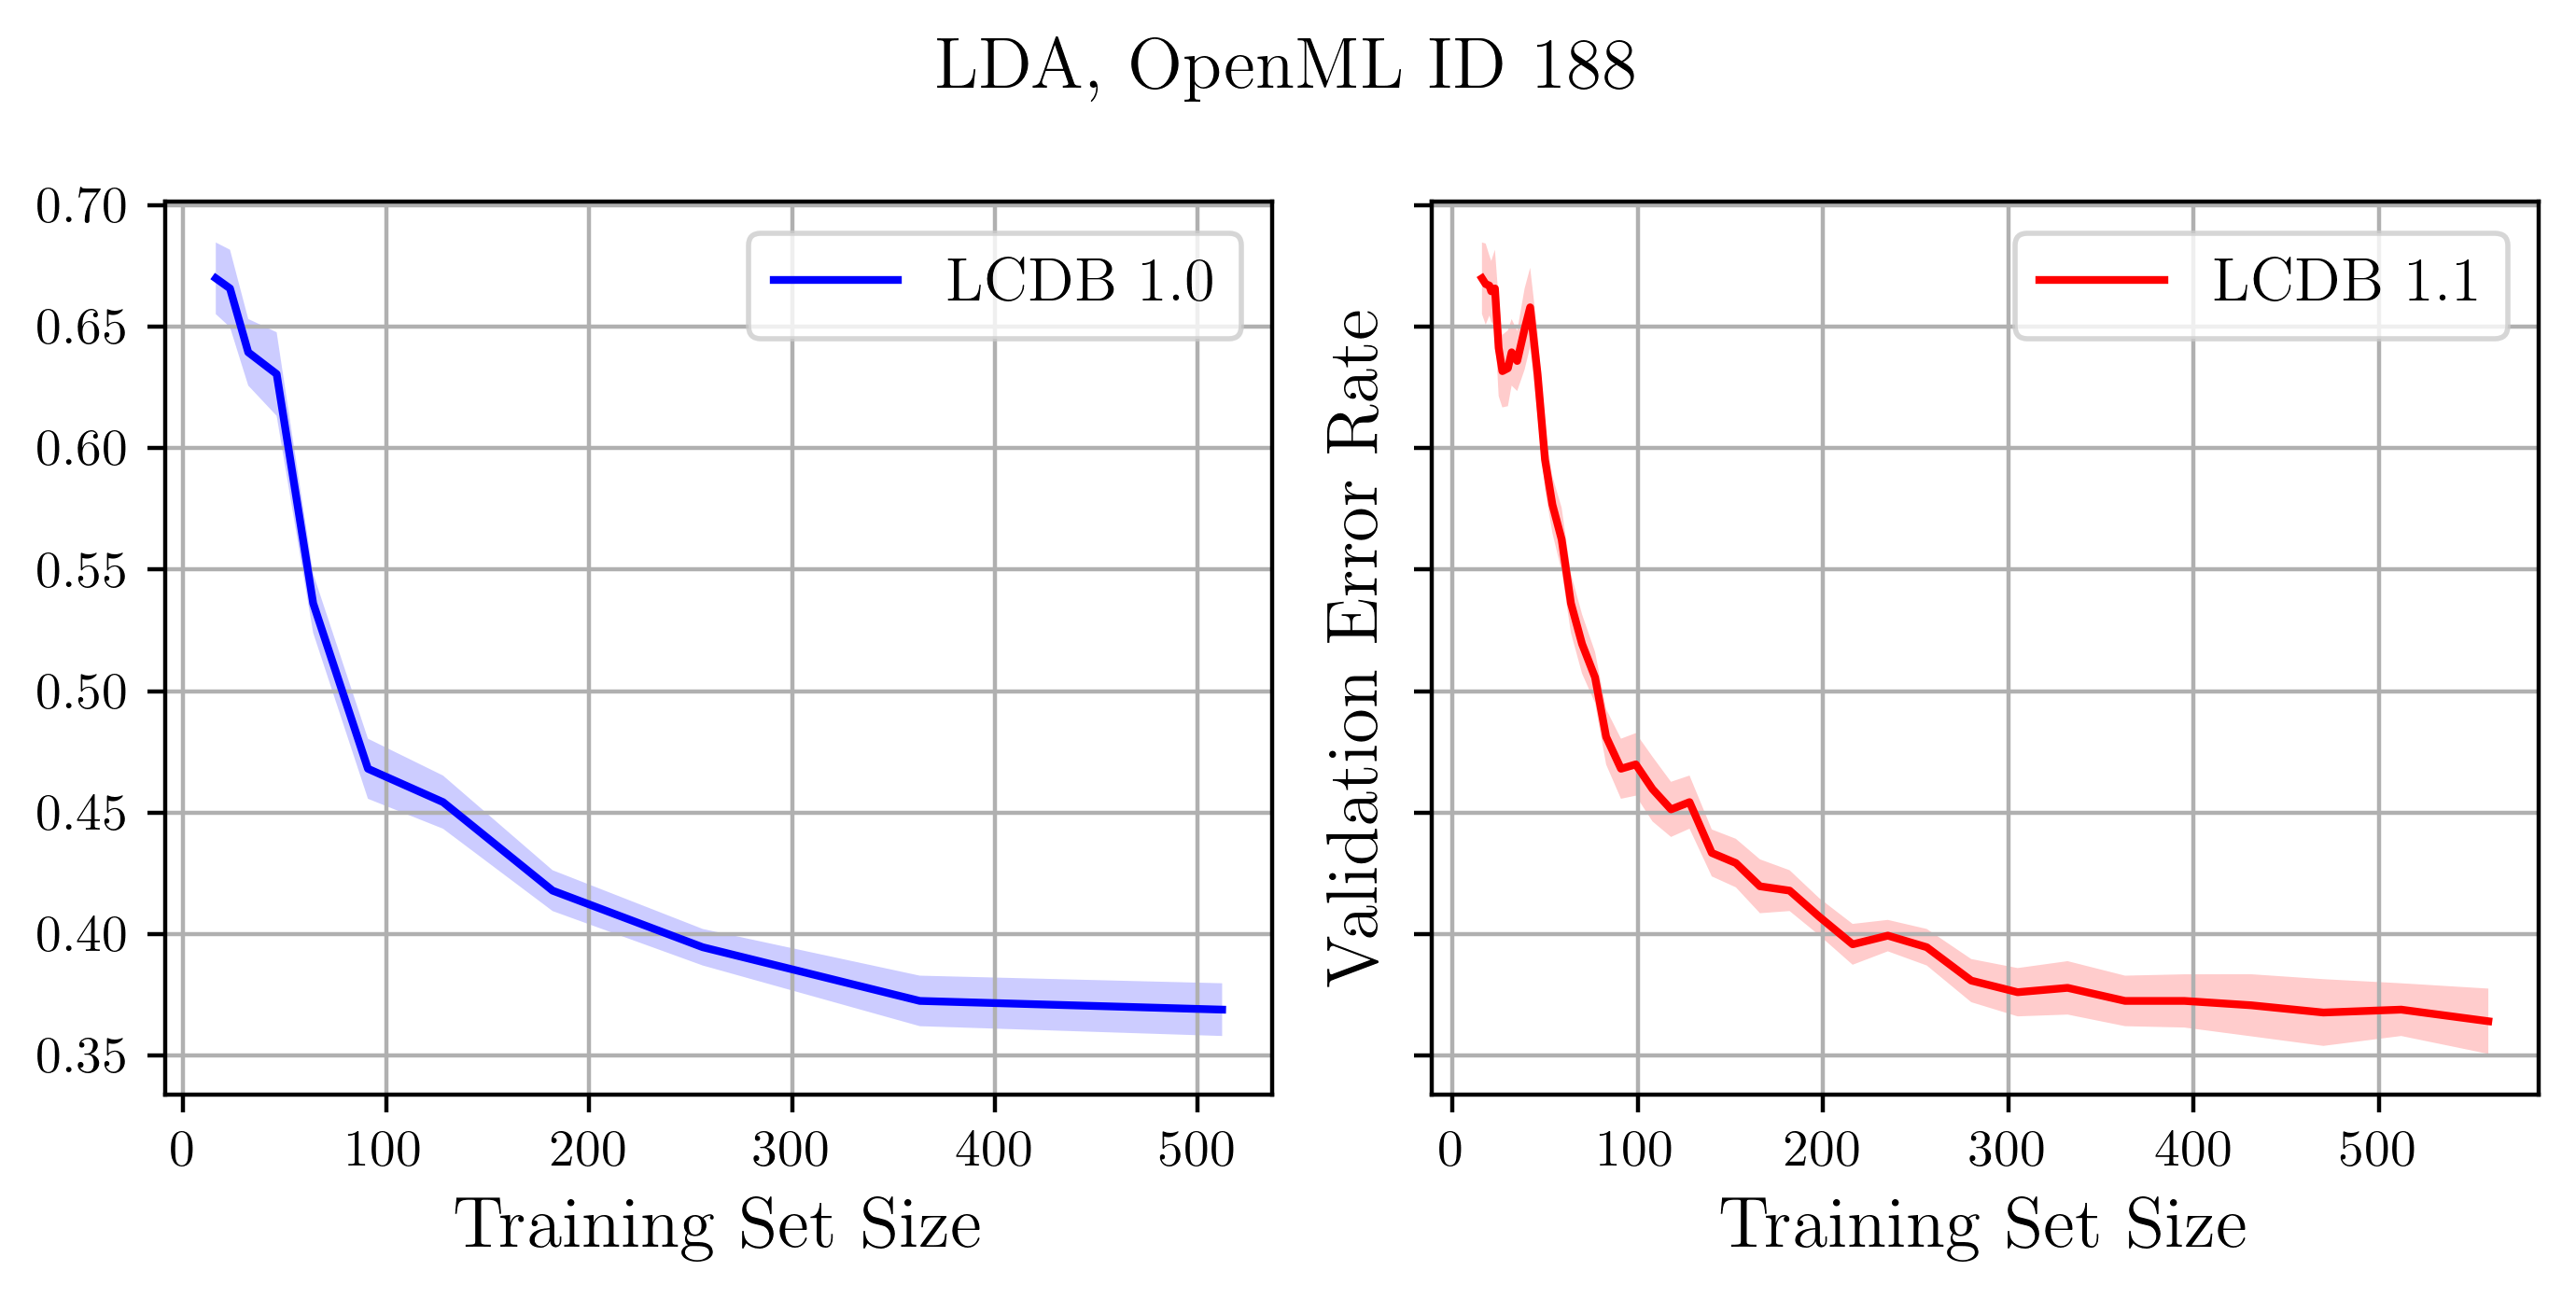

In [4]:
# well transition
LEARNER = 11
DATASET = 32  

# peaking
LEARNER, DATASET = 12, 6 
LEARNER, DATASET = 12, 22

print(f"learner: {LEARNER}, dataset: {DATASET}")

lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
se_clean = np.nanstd(lc_clean[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean[:, :, :]), axis=(0, 1)))

fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), dpi=400, sharey=True)

axs[0].plot(anchor_list_denser[::4], mean_clean[::4], color='blue', label="LCDB 1.0")
axs[0].fill_between(anchor_list_denser[::4], mean_clean[::4] - se_clean[::4], mean_clean[::4] + se_clean[::4], color='blue', alpha=0.2, edgecolor='none')
axs[0].set_xlabel('Training Set Size', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid()

axs[1].plot(anchor_list_denser, mean_clean, color='red', label="LCDB 1.1")
axs[1].fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, color='red', alpha=0.2, edgecolor='none')
axs[1].set_xlabel('Training Set Size', fontsize=14)
axs[1].set_ylabel('Validation Error Rate', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid()

plt.suptitle(f'{learner_zoo[LEARNER]}, OpenML ID {dataset_ids_CC18[DATASET]}', fontsize=14)
plt.tight_layout()
plt.show()

### feature scaling can change the shape of learning curves

learner: 11, dataset: 66


C:\Users\cyan1\AppData\Local\Temp\ipykernel_25704\497211767.py:32: RuntimeWarning: Mean of empty slice
  mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
C:\Users\cyan1\AppData\Local\Temp\ipykernel_25704\497211767.py:36: RuntimeWarning: Mean of empty slice
  mean_clean_fs = np.nanmean(lc_clean_fs[:, :, :], axis=(0, 1))
C:\Users\cyan1\AppData\Local\Temp\ipykernel_25704\497211767.py:40: RuntimeWarning: Mean of empty slice
  mean_clean_zfs = np.nanmean(lc_clean_zfs[:, :, :], axis=(0, 1))


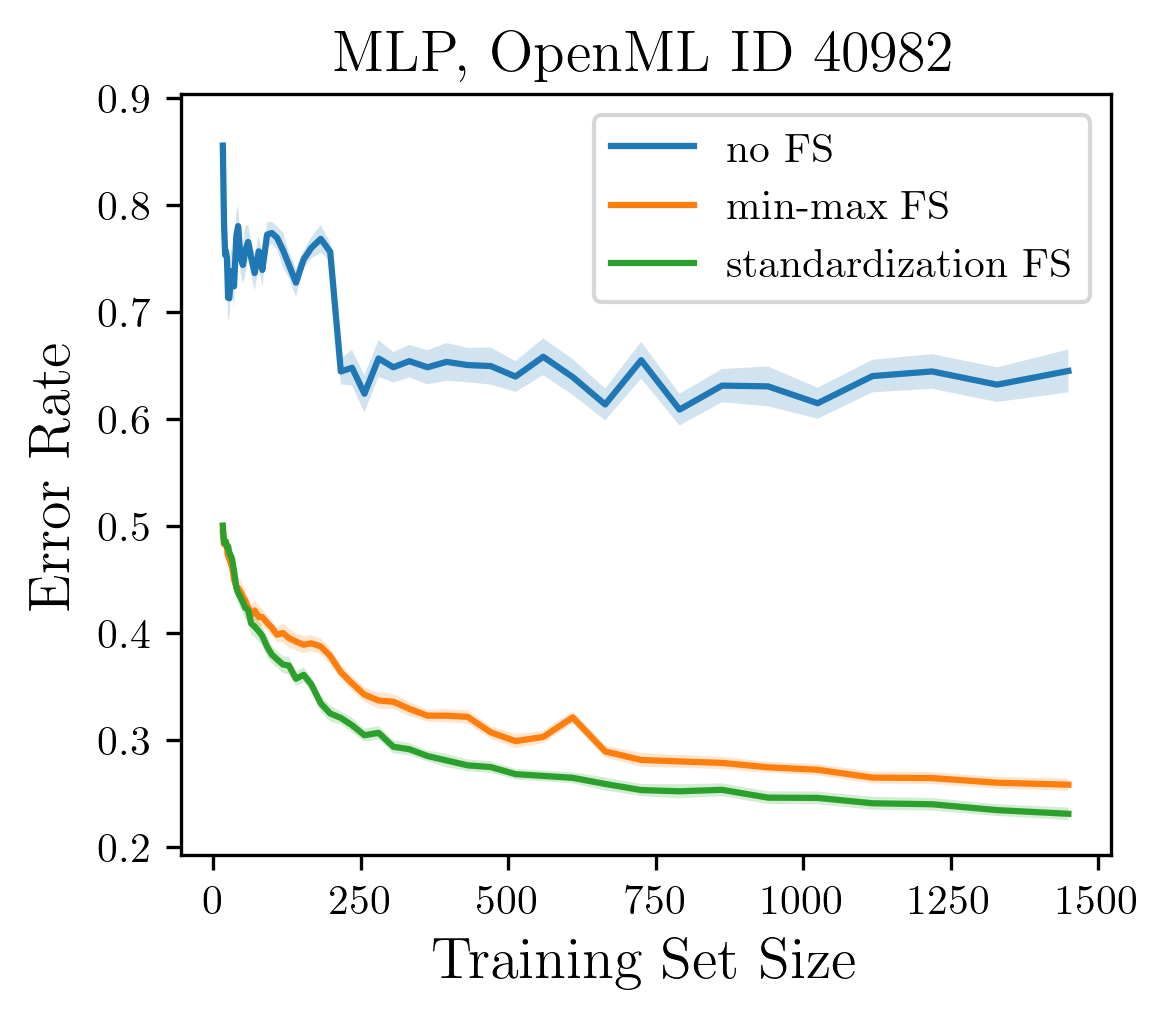

In [6]:
LEARNER = random.randint(0,23)
DATASET = random.randint(0,72)
# well pow
# LEARNER = 6
# DATASET = 1 

# well flat
# LEARNER = 19
# DATASET = 5 

# transition
LEARNER = 11
DATASET = 66

# peaking
# LEARNER = 12
# DATASET = 58 

# # dipping
# LEARNER = 3
# DATASET = 42

# ill flat
# LEARNER = 14
# DATASET = 4
# LEARNER = 2
# DATASET = 59

print(f"learner: {LEARNER}, dataset: {DATASET}")

lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
se_clean = np.nanstd(lc_clean[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean[:, :, :]), axis=(0, 1)))

lc_clean_fs = dataset_minmaxfs[DATASET, LEARNER, :, :, :, 1]
mean_clean_fs = np.nanmean(lc_clean_fs[:, :, :], axis=(0, 1))
se_clean_fs = np.nanstd(lc_clean_fs[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean_fs[:, :, :]), axis=(0, 1)))

lc_clean_zfs = dataset_standardfs[DATASET, LEARNER, :, :, :, 1]
mean_clean_zfs = np.nanmean(lc_clean_zfs[:, :, :], axis=(0, 1))
se_clean_zfs = np.nanstd(lc_clean_zfs[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean_zfs[:, :, :]), axis=(0, 1)))

plt.figure(figsize=(4, 3.5), dpi=300)
plt.plot(anchor_list_denser, mean_clean, label = 'no FS')
plt.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)
plt.plot(anchor_list_denser, mean_clean_fs, label = 'min-max FS')
plt.fill_between(anchor_list_denser, mean_clean_fs - se_clean_fs, mean_clean_fs + se_clean_fs, alpha=0.2)
plt.plot(anchor_list_denser, mean_clean_zfs, label = 'standardization FS')
plt.fill_between(anchor_list_denser, mean_clean_zfs - se_clean_zfs, mean_clean_zfs + se_clean_zfs, alpha=0.2)

plt.title(f'{learner_zoo[LEARNER]}, OpenML ID {dataset_ids_CC18[DATASET]}', fontsize=14)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()